In [1]:
import os
import sys
import rootpath
sys.path.append(rootpath.detect())
import pickle
from testsuite.utilities import Pareto_split
import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# plt.style.use('seaborn')
# import matplotlib.cm as cm
from testsuite.analysis import plot_pareto_2d, plot_all_pareto_2d, PLOT_STYLE, plot_measure

In [2]:
def load_all(directory):
    paths = [file for file in os.listdir(directory) if file[-4:] == ".pkl"]
    combined_resuts = {}
    for log_path in paths:
        result = pickle.load(open(os.path.join(directory, log_path), "rb"))
        for key, value in result.items():
            try:
                combined_resuts[key] += [value]
            except KeyError:
                combined_resuts[key] = [value]
                
    return combined_resuts

In [3]:
dir_path = os.path.join(rootpath.detect(), "experiments/wfg6_2obj/log_data")
result_dirs = os.listdir(dir_path)
result_dirs

['test_function_Saf_init10_MultiSurrogate_GP_ei',
 'test_function_Saf_init10_MultiSurrogate_GP_mean',
 'test_function_SmsEgo_init10_MultiSurrogate_GP_ei',
 'test_function_SmsEgo_init10_MultiSurrogate_GP_mean']

In [4]:
saf_ei_results = load_all(os.path.join(dir_path, result_dirs[0]))
saf_mu_results = load_all(os.path.join(dir_path, result_dirs[1]))
sms_ei_results = load_all(os.path.join(dir_path, result_dirs[2]))
sms_mu_results = load_all(os.path.join(dir_path, result_dirs[3]))

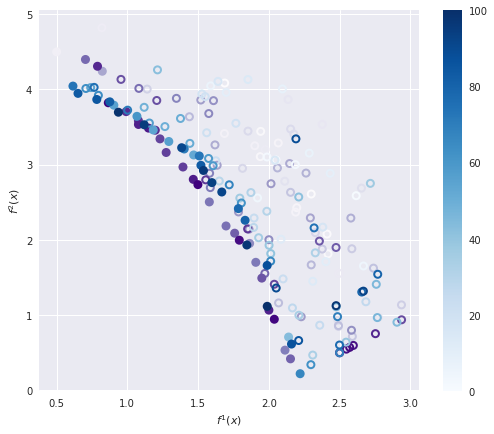

In [5]:
fig_safmu = plot_all_pareto_2d(saf_mu_results, plot_indices=[1, 2])

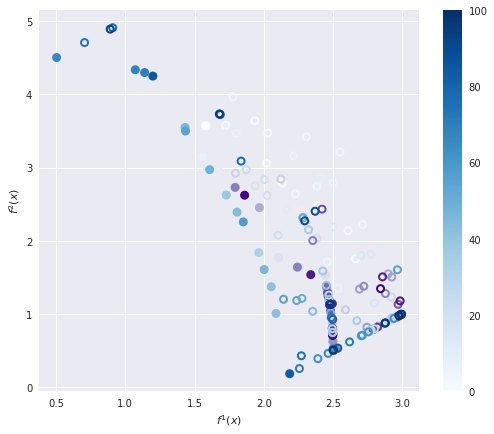

In [6]:
fig_safei = plot_all_pareto_2d(saf_ei_results, plot_indices=[1, 2])

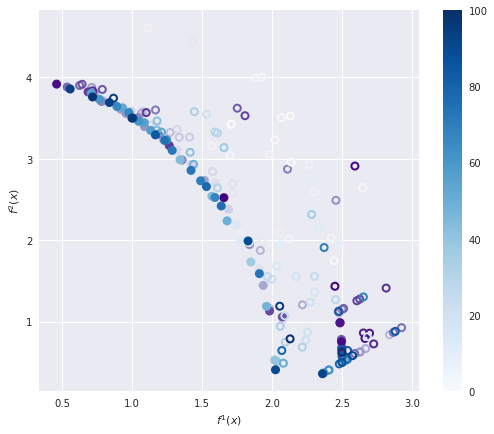

In [7]:
fig_smsmu = plot_all_pareto_2d(sms_mu_results, plot_indices=[1, 2])


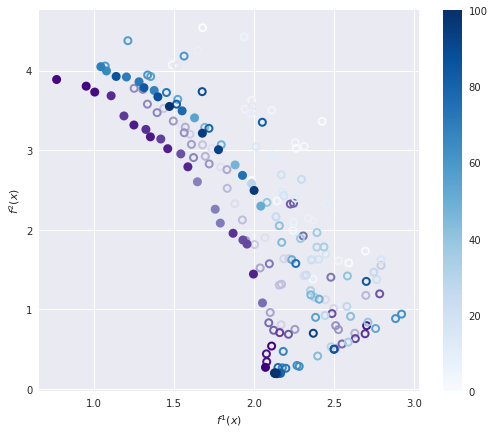

In [8]:
fig_smsmei= plot_all_pareto_2d(sms_ei_results, plot_indices=[1, 2])

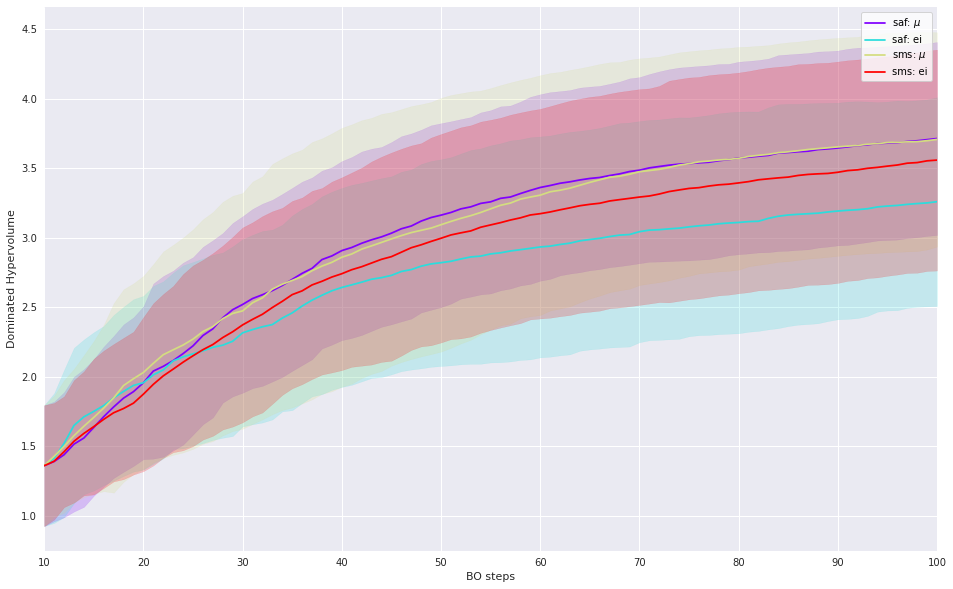

In [9]:
import matplotlib.pyplot as plt
with plt.style.context(PLOT_STYLE["plot_style"]):
    fig_hv = plt.figure(figsize=[16, 10])
    ax_hv = fig_hv.gca()

cmap = PLOT_STYLE['plot_cmap']
colors = cmap(np.linspace(0, 1, len(result_dirs)))

plot_measure(saf_mu_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="saf: $\mu$", color=colors[0])
plot_measure(saf_ei_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="saf: ei", color=colors[1])
plot_measure(sms_mu_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="sms: $\mu$", color=colors[2])
plot_measure(sms_ei_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="sms: ei", color=colors[3])
ax_hv.set_xlim([10, 100])
ax_hv.set_xlabel("BO steps")
ax_hv.set_ylabel("Dominated Hypervolume")
ax_hv.legend()

In [10]:
print(np.sum([len(errors) for errors in saf_ei_results["errors"]]), "\t",*[errors for errors in saf_ei_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in saf_mu_results["errors"]]), "\t",*[errors for errors in saf_mu_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in sms_ei_results["errors"]]), "\t",*[errors for errors in sms_ei_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in sms_mu_results["errors"]]), "\t",*[errors for errors in sms_mu_results["errors"] if len(errors)>0])

0 	
1 	 ['Error#02: Took 3 attempts to find unique solution at eval 12']
8 	 ['Error#02: Took 3 attempts to find unique solution at eval 97', 'Error#02: Took 2 attempts to find unique solution at eval 99'] ['Error#02: Took 3 attempts to find unique solution at eval 89', 'Error#02: Took 2 attempts to find unique solution at eval 93', 'Error#02: Took 2 attempts to find unique solution at eval 94', 'Error#02: Took 2 attempts to find unique solution at eval 97'] ['Error#02: Took 2 attempts to find unique solution at eval 87', 'Error#02: Took 3 attempts to find unique solution at eval 96']
12 	 ['Error#02: Took 2 attempts to find unique solution at eval 48', 'Error#02: Took 2 attempts to find unique solution at eval 57', 'Error#01: Failed to find unique new solution at eval 58', 'Error#02: Took 2 attempts to find unique solution at eval 59', 'Error#02: Took 2 attempts to find unique solution at eval 89', 'Error#02: Took 3 attempts to find unique solution at eval 90', 'Error#02: Took 2 attem

In [11]:
print([times for times in saf_ei_results["train_time"]])
print([times for times in saf_mu_results["train_time"]])
print([times for times in sms_ei_results["train_time"]])
print([times for times in sms_mu_results["train_time"]])


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
from pymoo.factory import get_performance_indicator
import wfg

In [13]:
N=200

## establish objective function
kfactor = 1
lfactor = 2
M = 5 # number of "underlying positional parameters" +1 
k = kfactor*(M-1) # position related parameers (must be devisible by M-1)
l = lfactor*2 # distance-related parameters, muist be even for WFG2 & WFG3
l = 3

n_obj = 2 # must be from 1:M 
n_dim = l+k

x_limits = np.zeros((2, n_dim))
x_limits[1] = np.array(range(1,n_dim+1))*2

# fun = BM.wfg
fun =wfg.WFG6
args = [k, n_obj] # number of objectives as argument


y = np.zeros((N, n_obj))
for n in range(N):
    z = wfg.random_soln(k, l, fun.__name__)
    y[n,:] = fun(z, k, n_obj)

In [14]:
igdp = get_performance_indicator("igd+", y)

def extract_performance(z, indicator):
    ANS  = []
    for i in range(9, len(z)):
        ans = indicator.calc(z[:i])
        ANS.append(ans)

    return ANS

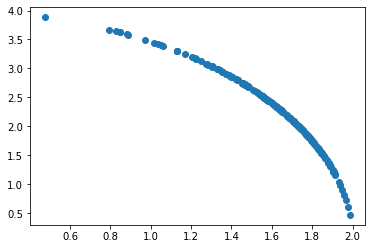

In [15]:
plt.scatter(y[:,0], y[:,1])

In [16]:
saf_mu_results['igd'] = [extract_performance(saf_mu_results["y"][i], igdp) for i in range(len(saf_mu_results["y"]))]
saf_ei_results['igd'] = [extract_performance(saf_ei_results["y"][i], igdp) for i in range(len(saf_ei_results["y"]))]
sms_mu_results['igd'] = [extract_performance(sms_mu_results["y"][i], igdp) for i in range(len(sms_mu_results["y"]))]
sms_ei_results['igd'] = [extract_performance(sms_ei_results["y"][i], igdp) for i in range(len(sms_ei_results["y"]))]

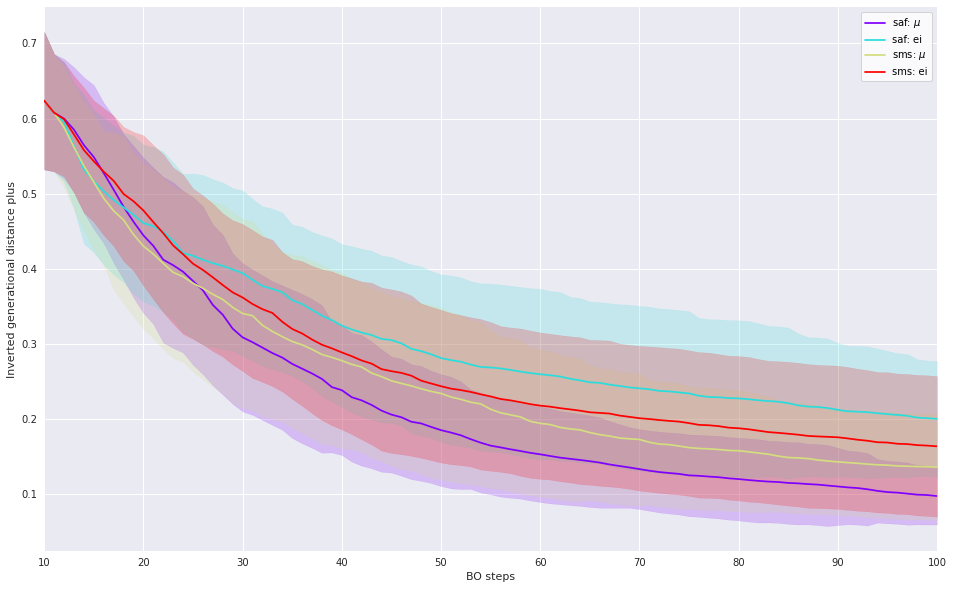

In [17]:
import matplotlib.pyplot as plt
with plt.style.context(PLOT_STYLE["plot_style"]):
    fig_hv = plt.figure(figsize=[16, 10])
    ax_hv = fig_hv.gca()

cmap = PLOT_STYLE['plot_cmap']
colors = cmap(np.linspace(0, 1, len(result_dirs)))

plot_measure(saf_mu_results, measure="igd", axis=ax_hv, plot_individuals=False, label="saf: $\mu$", color=colors[0])
plot_measure(saf_ei_results, measure="igd", axis=ax_hv, plot_individuals=False, label="saf: ei", color=colors[1])
plot_measure(sms_mu_results, measure="igd", axis=ax_hv, plot_individuals=False, label="sms: $\mu$", color=colors[2])
plot_measure(sms_ei_results, measure="igd", axis=ax_hv, plot_individuals=False, label="sms: ei", color=colors[3])
ax_hv.set_xlim([10, 100])
ax_hv.set_xlabel("BO steps")
ax_hv.set_ylabel("Inverted generational distance plus")
ax_hv.legend()